# Tech challenge

##### Context

Cobify is a company dedicated to people transport just like Uber, Lyft or even Cabify (who clearly stole our name).

Cobify was founded in 1992 coinciding with the Olympic Games hosted in Barcelona. Our company has always been known by:

 - Not having permits to drive people (we do know how to drive)
 - Using tricked-out high-end car

In our home town, Barcelona, VTC licenses have appeared and we have been able to start being a legal company, because we do have licenses now. However, we still keep using tricked-out high-end cars.

We are an old school company and data analysis falls far beyond our reach, and as we do not want to be on the news we want to know how you can help our business.

##### A bit of history of the gas problem ⛽️

Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

##### Your challenge starts here 📈

Now it is your turn: can you help us find the best combustible?

We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have 3 hours to turn the challenge in starting right now! 💸



## Exploratory data analysis

### Import libraries

In [67]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew, shapiro
from scipy import stats
import statsmodels.api as sm
import os


# sklearn modules for data preprocessing:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors


#Standard libraries for data visualization:
import seaborn as sns
from scipy.stats import boxcox 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Standard libraries for text analysis:
import re #regex
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import ssl
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer 
nltk.download('stopwords')
from collections import Counter, OrderedDict
from operator import itemgetter

from gensim.models.phrases import Phrases, Phraser
import gensim
from gensim.models import Word2Vec

#Standard libraries for web scraping / API
from tqdm import tqdm # tqdm is for printing the status bar
from bs4 import BeautifulSoup


pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariaesquivel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariaesquivel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariaesquivel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Get to know the domain

In [68]:
measurements = pd.read_csv('measurements.csv')
print(measurements.shape)
measurements.head(10)

(388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


### Explore your data

In [69]:
measurements.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

1. distance - distance (km);
2. consume - the consume (L/100km);
3. speed - the average speed (km/h),
4. temp_inside - the temperature inside (°C)
5. temp_outside - the temperature outside (°C)
6. specials - anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it…
7. gas_type - the gas type used.

I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

In [70]:
measurements.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [71]:
# check NaN
# create a dataframe to store percentage of nulls
nulls_measurements = pd.DataFrame(measurements.isna().sum()/len(measurements)).reset_index()
nulls_measurements.columns = ['column_name', 'nulls_percentage']
nulls_measurements[nulls_measurements['nulls_percentage'] > 0]

,column_name,nulls_percentage
3,temp_inside,0.030928
5,specials,0.760309
10,refill liters,0.966495
11,refill gas,0.966495


In [72]:
#Unique values in each variable:

for c in measurements.columns.tolist():  
    print(c, len(measurements[c].unique()))

distance 174
consume 43
speed 60
temp_inside 14
temp_outside 33
specials 13
gas_type 2
AC 2
rain 2
sun 2
refill liters 11
refill gas 3


In [73]:
#Unique values in each variable:

cat_cols=[col for col in measurements.columns if (measurements[col].dtype==object)]     # categorical columns

print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print('Name: {}'.format(measurements[c].name))    # column name
    print('Type: {}'.format(measurements[c].dtype))   # column type
    print('Unique values: {}'.format(len(measurements[c].unique())))   # column unique values
    print(measurements[c].unique())
    print(((measurements[c].value_counts(dropna = False)/ sum(measurements[c].value_counts(dropna = False)))*100))   # percentage
    print('\n----------')

Categorical Features: 7
----------
Name: distance
Type: object
Unique values: 174
['28' '12' '11,2' '12,9' '18,5' '8,3' '7,8' '12,3' '4,9' '11,9' '12,4'
 '11,8' '24,7' '17,3' '33,4' '25,9' '25,3' '14,2' '17,9' '18,4' '18,3'
 '32,6' '19' '12,1' '20' '4,5' '11,7' '10,2' '5,4' '2' '16' '27,3' '10,6'
 '11,6' '13,1' '6,1' '153,5' '2,9' '2,1' '9,8' '6,8' '14' '13,9' '9,7'
 '24,8' '34,8' '5,2' '10,5' '13,2' '13' '12,2' '12,5' '15,7' '6,4' '5,3'
 '26,2' '18,8' '22,9' '162,7' '16,6' '15,9' '5,1' '22,4' '31,1' '16,1'
 '4,2' '17,4' '23,5' '7' '20,1' '20,8' '1,7' '35,9' '36,9' '16,8' '9,9'
 '36,6' '44,9' '21,6' '39,4' '26,6' '53,2' '18,9' '43,5' '16,4' '21,1'
 '22,7' '44,4' '35,8' '40,6' '14,1' '58,7' '16,2' '31,8' '51,6' '38,6'
 '81,2' '130,3' '67,2' '43,7' '56,1' '39' '38,5' '28,2' '19,6' '22,2'
 '13,6' '12,6' '8,7' '7,9' '2,4' '18,1' '1,3' '13,4' '12,8' '29' '31,4'
 '27,1' '25,2' '14,3' '16,9' '9,2' '31,5' '24,9' '17' '7,4' '25,7' '24,5'
 '4,1' '15,4' '101,9' '93,9' '32,1' '48,6' '37,2' '28,8' 

As you can see above, the data set is slightly imbalanced with a higher proportion of cars using E10 compared to SP98. Since is the imbalance is not very strong we will not deal with that for now

In [75]:
measurements[measurements['specials'] == 'AC rain']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
40,"12,4",4,55,"21,5",7,AC rain,E10,1,1,0,NaN,NaN
60,"2,9","7,9",18,"21,5",9,AC rain,SP98,1,1,0,NaN,NaN
94,"11,8","5,9",21,20,9,AC rain,SP98,1,1,0,NaN,NaN
101,"26,2","5,8",71,21,8,AC rain,SP98,1,1,0,NaN,NaN
104,"12,4","5,4",18,21,11,AC rain,SP98,1,1,0,NaN,NaN
153,"17,3",5,61,"21,5",6,AC rain,E10,1,1,0,NaN,NaN
204,"8,7","5,3",28,"22,5",12,AC rain,SP98,1,1,0,NaN,NaN
228,13,"5,7",38,"22,5",3,AC rain,SP98,1,1,0,NaN,NaN
277,16,"4,4",40,22,7,AC rain,SP98,1,1,0,NaN,NaN


### Clean your data

In [98]:
def clean_up(df):
    
    # drop duplicates
    df = df.drop_duplicates()
    
    # drop columns where %nulls is greater than 0.9
    nulls_measurements = pd.DataFrame(measurements.isna().sum()/len(measurements)).reset_index()
    nulls_measurements.columns = ['column_name', 'nulls_percentage']
    columns_NaN = nulls_measurements[nulls_measurements['nulls_percentage'] > 0.9]
    drop_columns_list = list(columns_NaN['column_name'])
    df = df.drop(drop_columns_list, axis = 1)
    
    # Since there are only 12 rows where temp_inside is NaN, we will drop them 
    df = df[df['temp_inside'].notna()]
    
    # drop 'specials' column. Columns 'AC', 'rain' and 'sun' show the same infomations 
    df = df.drop(['specials'], axis = 1)
    
    
    # change data types to numeric
    df['distance'] = [float(str(i).replace(',', '.')) for i in df['distance']]
    df['temp_inside'] = [float(str(i).replace(',', '.')) for i in df['temp_inside']]
    df['consume'] = [float(str(i).replace(',', '.')) for i in df['consume']]
    
    # change data types to categorical
    df['AC'] = df['AC'].astype(object)
    df['rain'] = df['rain'].astype(object)
    df['sun'] = df['sun'].astype(object)
    
    
    return df

In [99]:
measurements_cleaned = clean_up(measurements)

In [100]:
print(measurements_cleaned.shape)
measurements_cleaned.head(10)

(376, 9)


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
5,8.3,6.4,50,21.5,10,E10,0,0,0
6,7.8,4.4,43,21.5,11,E10,0,0,0
7,12.3,5.0,40,21.5,6,E10,0,0,0
8,4.9,6.4,26,21.5,4,E10,0,0,0
9,11.9,5.3,30,21.5,9,E10,0,0,0


In [101]:
# Revalidate data types
measurements_cleaned.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC               object
rain             object
sun              object
dtype: object

In [102]:
# Revalidate NANs
measurements_cleaned.isna().sum()   

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### Visualization

#### Take a look and find connections between data

##### Bar plot for each numerical variable.

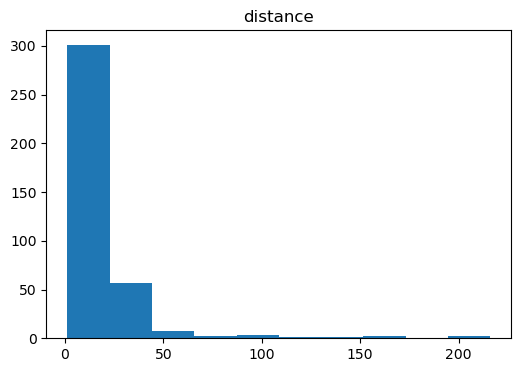

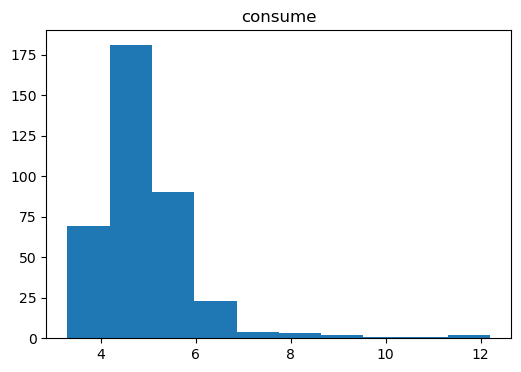

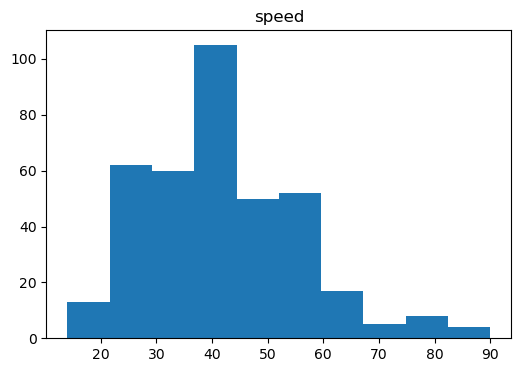

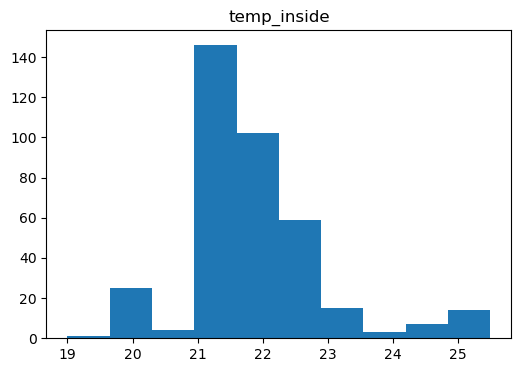

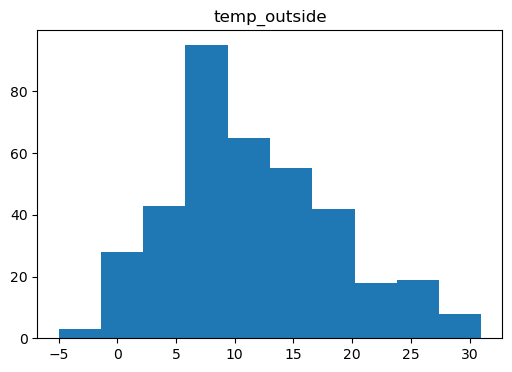

In [103]:
num_cols = measurements_cleaned.select_dtypes(include=np.number)

for c in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(measurements_cleaned[c])
    plt.title(c)
    plt.show();

##### Box plot for each numerical variable for know outliers of each feature.

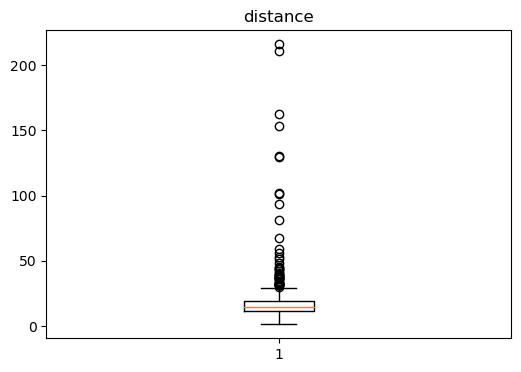

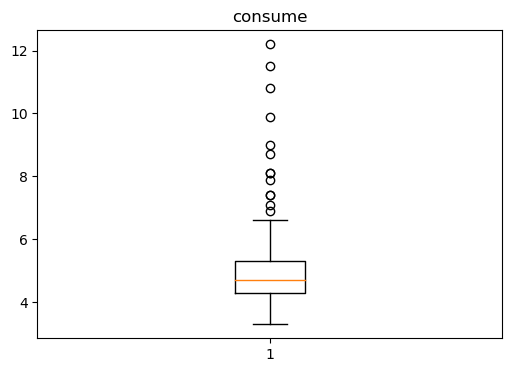

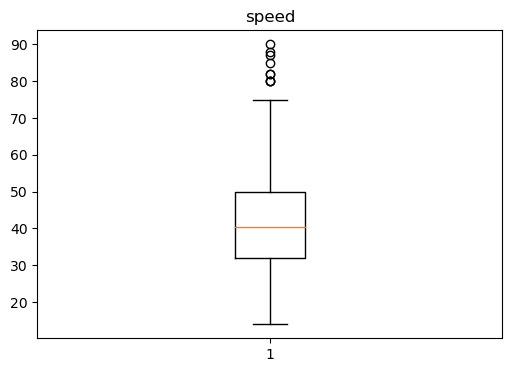

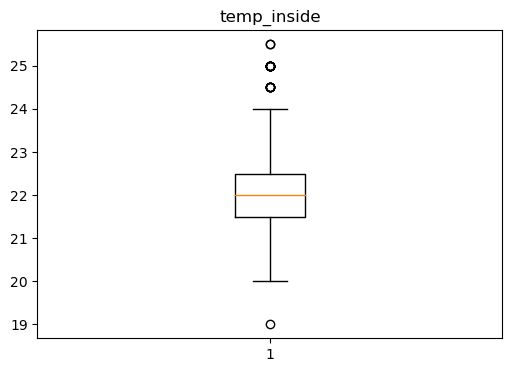

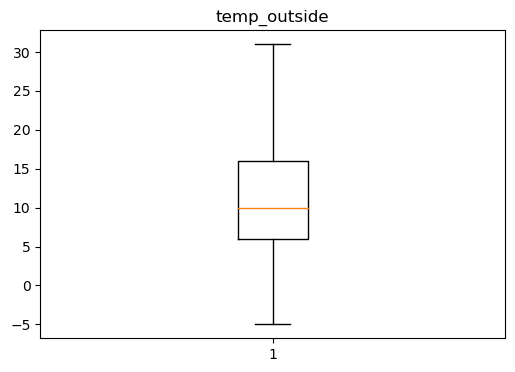

In [105]:
for c in num_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(measurements_cleaned[c])
    plt.title(c)
    plt.show();

##### Show a plot of the distances by gas_type.

In [141]:
measurements_cleaned['gas_type'].value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

gas_type
E10     21.095541
SP98    18.866667
Name: distance, dtype: float64


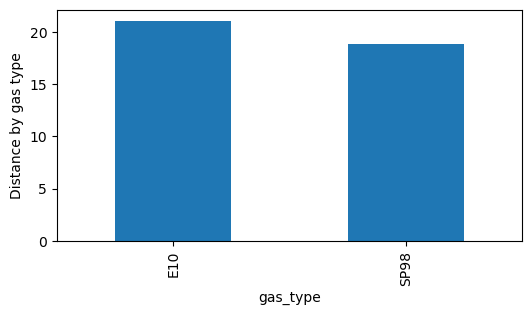

In [114]:
print(measurements_cleaned.groupby('gas_type')['distance'].mean())

plt.figure(figsize=(6,3))
measurements_cleaned.groupby('gas_type')['distance'].mean().plot.bar()
plt.ylabel('Distance by gas type')
plt.show()


In [115]:
measurements_cleaned['distance'].mean()

19.797340425531914

The total average distance traveled is 19.8 km. The average distance traveled when using E10 (21.1 km) is higher than when using SP98 (18.9 km).

##### Show a plot of the consumption by gas_type.

gas_type
E10     4.950955
SP98    4.906849
Name: consume, dtype: float64


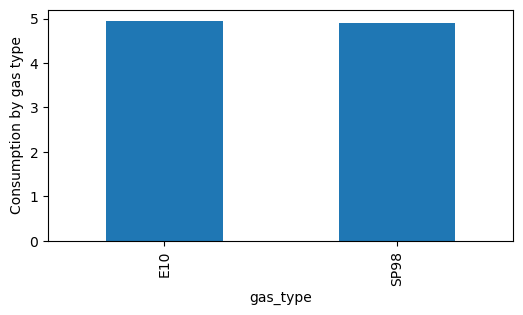

In [116]:
print(measurements_cleaned.groupby('gas_type')['consume'].mean())

plt.figure(figsize=(6,3))
measurements_cleaned.groupby('gas_type')['consume'].mean().plot.bar()
plt.ylabel('Consumption by gas type')
plt.show()

In [117]:
measurements_cleaned['consume'].mean()

4.925265957446804

The overall mean gas cunsumption is 4.925 L/100km.

The average gas consumption does not differ much between E10 (4.95 L/100km) and SP98 (4.90 L/100km).

##### Show a plot of the consumption by gas_type when AC is on.

In [142]:
measurements_cleaned['AC'].value_counts()

0    346
1     30
Name: AC, dtype: int64

In [122]:
AC_data = measurements_cleaned.groupby(['gas_type','AC']).agg({'consume':'mean'}).reset_index()
AC_data.head()

,gas_type,AC,consume
0,E10,0,4.943333
1,E10,1,5.114286
2,SP98,0,4.860714
3,SP98,1,5.300000


However, consumption changes when AC is on, as demonstrated above.

For both types, gas consumption goes up when the AC is on: for E10 to 5.11 L/100km and for SP98 tp 5.3 L/100km.

The average gas consumption does not change much for E10 (4.94 L/100km) when the AC is off but it goes down for SP98 4.86 L/100km.

##### Show a plot of the consumption by gas_type when when it is raining.

In [143]:
measurements_cleaned['rain'].value_counts()

0    329
1     47
Name: rain, dtype: int64

In [123]:
rain_data = measurements_cleaned.groupby(['gas_type','rain']).agg({'consume':'mean'}).reset_index()
rain_data.head()

,gas_type,rain,consume
0,E10,0,4.877305
1,E10,1,5.600000
2,SP98,0,4.790957
3,SP98,1,5.609677


From the analysis above, we can see that rain impacts gas consumption:
 - When it rains, consumption goes up for E10 to 5.6 L/100km and for SP98 tp 5.61 L/100km.
 - On the other hand, when the weather is dry, the average gas consumption drops to 4.88 L/100km for E10 and to 4.79 L/100km for SP98

##### Check changes to consumption when it is sunny enough that the car felt warm


In [144]:
measurements_cleaned['sun'].value_counts()

0    345
1     31
Name: sun, dtype: int64

In [124]:
sun_data = measurements_cleaned.groupby(['gas_type','sun']).agg({'consume':'mean'}).reset_index()
sun_data.head()

,gas_type,sun,consume
0,E10,0,4.986986
1,E10,1,4.472727
2,SP98,0,4.971357
3,SP98,1,4.265000


Looking at the above table, we can conlude that warmer weather influences gas consumption. 

##### Temperature vs Consumption

In [146]:
measurements_cleaned['temp_outside'].mean()

11.340425531914894

<Figure size 600x300 with 0 Axes>

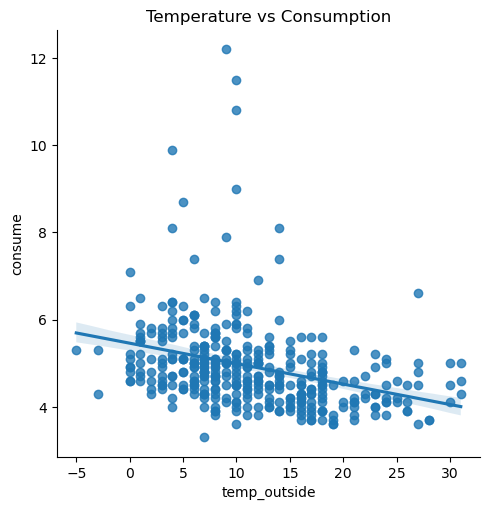

In [130]:
plt.figure(figsize=(6,3))
sns.lmplot(x = 'temp_outside', y = 'consume',data=measurements_cleaned)
plt.title('Temperature vs Consumption')
plt.show()

In general, the warmer the weather gets, lower is consumption of gas

In [135]:
AC_temp_data = measurements_cleaned.groupby(['AC']).agg({'temp_outside':'mean'}).reset_index()
AC_temp_data.head()

,AC,temp_outside
0,0,10.988439
1,1,15.400000


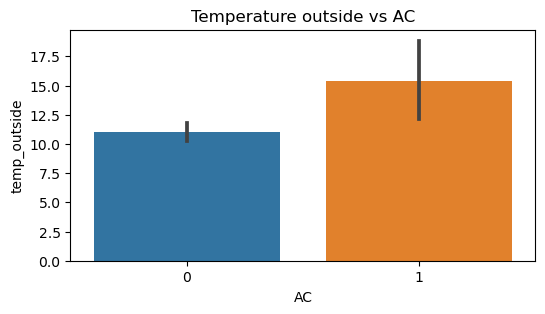

In [138]:
plt.figure(figsize=(6,3))
sns.barplot(x= 'AC',y='temp_outside',data=measurements_cleaned)
plt.title('Temperature outside vs AC')
plt.show()

In general, when temperatures were higher than 12.5 C, AC was turned on. As shown above, gas consumption goes up when the AC is on regardless the gas type.

##### speed vs consumption

gas_type
E10     43.566879
SP98    40.803653
Name: speed, dtype: float64


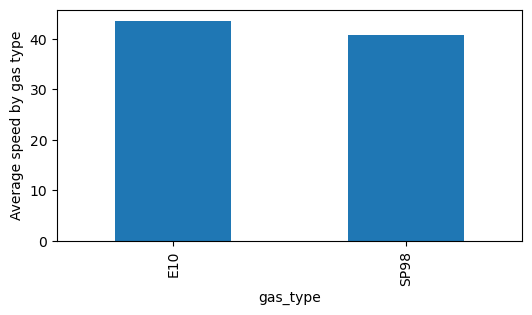

In [145]:
print(measurements_cleaned.groupby('gas_type')['speed'].mean())

plt.figure(figsize=(6,3))
measurements_cleaned.groupby('gas_type')['speed'].mean().plot.bar()
plt.ylabel('Average speed by gas type')
plt.show()

<Figure size 600x300 with 0 Axes>

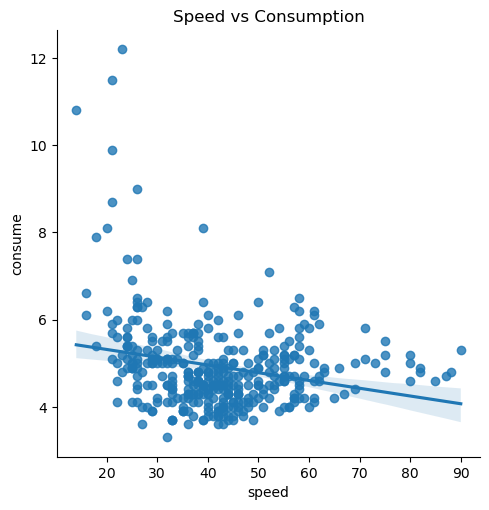

In [139]:

plt.figure(figsize=(6,3))
sns.lmplot(x = 'speed', y = 'consume',data=measurements_cleaned)
plt.title('Speed vs Consumption')
plt.show()

Generally, as the speed increases the gas consumption decreases.

Higher consumption when speed is very low is due to the fact that a car puts a lot of extra work on the engine to start moving.

##### Correlations

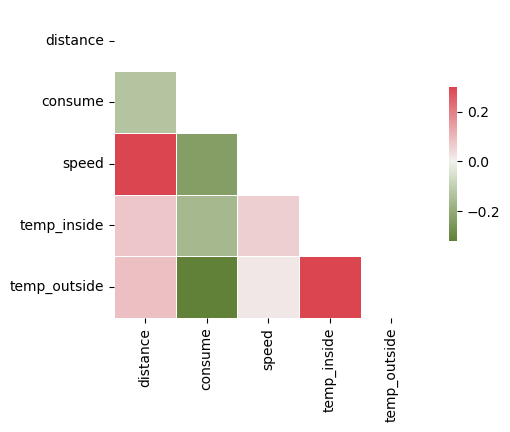

In [104]:


corr=measurements_cleaned.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(7, 4))                 # set up the matplotlib figure

cmap=sns.diverging_palette(110, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

##### Conclusions

SP98 was the most used gas type for the period of the exercise
 - SP98    219
 - E10     157

Distance
 - average distance travelled using E10 was higher meaning that by using this type, it is possible to travel longer distances

Gas consumption
 - Overall, gas consumption is lower with SP98 (4.906849 L/100km) but is not significantly better.
 - However, when anything special happens like when it is raining or the AC is on, E10 comes up better.
 
Speed
 - Generally, as the speed increases the gas consumption decreases.
 - Average speed using E10 is higher than when using SP98

### Predictions

#### Hypothesis test

Test whether there is a relationship between gas consumption and temperature

In [150]:
data_crosstab = pd.crosstab(measurements_cleaned['temp_outside'], measurements_cleaned['consume'], margins = False)

In [153]:
import scipy.stats as st
pvalue=st.chi2_contingency(data_crosstab)[1]
pvalue


0.38807264696042054

In [155]:
dof=st.chi2_contingency(data_crosstab)[2]
dof

1344

At 0.05% level of significance, we accept the null hypotheses. Temperature and consumption are independent

#### Prediction

##### Splitting into train set and test set

In [156]:
# first, split X-y (learning-target data)
X = measurements_cleaned.drop(columns=['consume'])
y = measurements_cleaned['consume']

# checking shape
print(X.shape)
print(y.shape)

(376, 8)
(376,)


##### train_test_split

In [157]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)  # random state fixed sample

##### Scaling numerical data

In [159]:
#cat/num X-train
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

# N X-train
transformer = MinMaxScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,distance,speed,temp_inside,temp_outside
0,0.071229,0.421053,0.461538,0.277778
1,0.065642,0.368421,0.461538,0.972222
2,0.431099,0.973684,0.615385,0.638889
3,0.196462,0.868421,0.384615,0.222222
4,0.100559,0.618421,0.384615,0.333333
...,...,...,...,...
71,0.058659,0.197368,0.384615,0.305556
72,0.128957,0.171053,0.538462,0.472222
73,0.069832,0.276316,0.461538,0.777778
74,0.241620,0.750000,0.384615,0.194444


##### Encoding Categorical Data

In [174]:
X_train_cat.columns

,gas_type,AC,rain,sun
116,SP98,0,1,0
228,SP98,1,1,0
362,SP98,0,0,0
204,SP98,1,1,0
75,SP98,0,0,0
...,...,...,...,...
71,SP98,0,0,0
113,SP98,0,0,0
282,SP98,0,0,0
360,SP98,0,0,0


In [175]:
# Onehot encoding
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)

X_train_encoded_onehot = encoder.transform(X_train_cat).toarray()
X_train_encoded_onehot = pd.DataFrame(X_train_encoded_onehot)
X_train_encoded_onehot.columns = X_train_cat.columns


X_test_encoded_onehot = encoder.transform(X_test_cat).toarray()
X_test_encoded_onehot = pd.DataFrame(X_test_encoded_onehot)
X_test_encoded_onehot.columns = X_train_cat.columns

In [176]:
#merging the data and training set with encoded and normalized values and the dropped special_features
# Training data first
X_train_nrml = pd.concat([X_scaled_train,X_train_encoded_onehot], axis = 1)
X_train_nrml

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,0.048883,0.157895,0.615385,0.250000,1.0,0.0,1.0,0.0
1,0.054469,0.315789,0.538462,0.222222,1.0,1.0,1.0,0.0
2,0.065642,0.539474,0.461538,0.638889,1.0,0.0,0.0,0.0
3,0.034451,0.184211,0.538462,0.472222,1.0,1.0,1.0,0.0
4,0.060056,0.315789,0.384615,0.333333,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
295,0.003259,0.078947,0.384615,0.416667,1.0,0.0,0.0,0.0
296,0.098231,0.684211,0.230769,0.333333,1.0,0.0,0.0,0.0
297,0.068436,0.342105,0.461538,0.361111,1.0,0.0,0.0,0.0
298,0.021881,0.171053,0.461538,0.611111,1.0,0.0,0.0,0.0


In [177]:
#merging test data
X_test_nrml = pd.concat([X_scaled_test,X_test_encoded_onehot], axis = 1)

##### Modeling

In [181]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train_nrml, y_train)   # model train
y_pred_linreg=linreg.predict(X_test_nrml)   # model prediction

In [182]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train_nrml, y_train)

y_pred_rfr=rfr.predict(X_test_nrml)

In [ ]:
Model Validation

In [184]:
models=[linreg,rfr]
model_names=['linreg','rfr',]
preds=[y_pred_linreg, y_pred_rfr]

In [ ]:
R2

In [185]:
for i in range(len(models)):

    train_score=models[i].score(X_train_nrml, y_train) #R2
    test_score=models[i].score(X_test_nrml, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.20575179491189577 -- test R2: 0.203474496495474
Model: rfr, train R2: 0.9308490049991807 -- test R2: 0.6948531035774608
